# Actividad 4 - Empresas y Sectores Tecnológicos

## Requisitos de ejecución
- Pueden observarse en el fichero `requirements.txt` pero son los siguientes:
    - Python 3.8.10 y los siguientes paquetes:
        ````
        anyio==3.3.4
        argon2-cffi==21.1.0
        attrs==21.2.0
        Babel==2.9.1
        backcall==0.2.0
        bleach==4.1.0
        certifi==2021.10.8
        cffi==1.15.0
        charset-normalizer==2.0.7
        colorama==0.4.4
        cycler==0.11.0
        debugpy==1.5.1
        decorator==5.1.0
        defusedxml==0.7.1
        entrypoints==0.3
        idna==3.3
        importlib-resources==5.4.0
        investpy==1.0.7
        ipykernel==6.5.0
        ipython==7.29.0
        ipython-genutils==0.2.0
        jedi==0.17.2
        Jinja2==3.0.2
        json5==0.9.6
        jsonschema==4.2.1
        jupyter-client==7.0.6
        jupyter-core==4.9.1
        jupyter-server==1.11.2
        jupyterlab==3.2.2
        jupyterlab-pygments==0.1.2
        jupyterlab-server==2.8.2
        jupyterlab-tabnine==0.0.24
        kiwisolver==1.3.2
        lxml==4.6.4
        MarkupSafe==2.0.1
        matplotlib==3.4.3
        matplotlib-inline==0.1.3
        mistune==0.8.4
        nbclassic==0.3.4
        nbclient==0.5.4
        nbconvert==6.2.0
        nbformat==5.1.3
        nest-asyncio==1.5.1
        notebook==6.4.5
        numpy==1.21.4
        packaging==21.2
        pandas==1.3.4
        pandocfilters==1.5.0
        parso==0.7.1
        pickleshare==0.7.5
        Pillow==8.4.0
        pluggy==1.0.0
        prometheus-client==0.12.0
        prompt-toolkit==3.0.22
        pycparser==2.20
        Pygments==2.10.0
        pyparsing==2.4.7
        pyrsistent==0.18.0
        python-dateutil==2.8.2
        python-jsonrpc-server==0.4.0
        python-language-server==0.36.2
        pytz==2021.3
        pywin32==302
        pywinpty==1.1.5
        pyzmq==22.3.0
        requests==2.26.0
        scipy==1.7.1
        Send2Trash==1.8.0
        six==1.16.0
        sniffio==1.2.0
        terminado==0.12.1
        testpath==0.5.0
        tornado==6.1
        traitlets==5.1.1
        ujson==4.2.0
        Unidecode==1.3.2
        urllib3==1.26.7
        wcwidth==0.2.5
        webencodings==0.5.1
        websocket-client==1.2.1
        zipp==3.6.0
        ````

## Nota importante
- Este librillo puede presentar algún problema porque, `investpy`, no incluye alguno de los Stocks aquí tratados. Para poder utilizarlos habrá que añadir al fichero que contiene las referencias a todos estos Stocks el Stock correspondiente.
    - Para hacer esto hay que buscar el fichero mencionado en la librería `investpy` instalada (van modificando cada 2 meses los Stocks disponibles), ruta relativa: `.../<PythonEnv>/Libs/site-packages/investpy/resources/stocks.csv`
    

## Conclusiones Empresas a analizar
- Compararemos a MongoDB con las siguientes empresas:
    - Elastic NC (ESTC)
    - Workiva (WK)
    - Amazon (AMZN)
    - Oracle (ORCL)
    - Splunk (SPLK)
    - Microsoft (MSFT)
    - Google (GOOGL)
    - IBM (IBM)
    - SAP SE (SAP)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import investpy
import csv

In [5]:
SYMBOLS_TRACKED = [
    'MDB', 'ESTC', 'WK', 'AMZN',
    'ORCL', 'SPLK', 'MSFT', 'GOOGL',
    'IBM', 'SAP'
]

INDEXES_TRACKED = [
    'NASDAQ', 'NYSE COMPOSITE'
]

def get_stocks_info(symbols_tracked):
    info = pd.DataFrame()
    for symbol in symbols_tracked:
        try:
            newRow = investpy.stocks.get_stock_information(country='united states', stock=symbol)
            newRow.at[0, 'Revenue'] = parse_million_to_float(newRow.loc[0]['Revenue'])
            newRow.at[0, 'Beta'] = np.nan if newRow.loc[0]['Beta'] == '-' else newRow.loc[0]['Beta']
            newRow.at[0, 'P/E Ratio'] = np.nan if newRow.loc[0]['P/E Ratio'] == '-' else newRow.loc[0]['P/E Ratio']
            info = pd.concat([info, newRow], ignore_index=True)
        except (RuntimeError):
            raise Exception('Debes introducir el símbolo {} en stocks.csv (suele estar en ...\investpy\resources), algo de info: {}'
                            .format(symbol, investpy.search_quotes(text=symbol, products=['stocks'], countries=['united states'], n_results=1).__dict__))
    return info

def parse_million_to_float(millions):
    if type(millions) is str:
        return float(millions.replace('M', ''))*1e6
    return millions

In [6]:
info = get_stocks_info(SYMBOLS_TRACKED)
info

,Stock Symbol,Prev. Close,Todays Range,Revenue,Open,52 wk Range,EPS,Volume,Market Cap,Dividend (Yield),Average Vol. (3m),P/E Ratio,Beta,1-Year Change,Shares Outstanding,Next Earnings Date
0,MDB,535.08,539.11-557.08,702170000.0,540.54,219.57-557.08,-4.74,992849.0,3.677000e+10,N/A(N/A),806766.0,NaN,0.63,120.12%,6.617810e+07,08/12/2021
1,ESTC,171.34,166.28-174.97,672710000.0,174.07,97.98-181.99,-1.63,619910.0,1.546000e+10,N/A(N/A),773518.0,NaN,NaN,49.31%,9.204840e+07,02/12/2021
2,WK,157.98,157.57-162.79,391740000.0,158.73,66.15-173.24,-0.61,513772.0,8.140000e+09,N/A(N/A),380536.0,NaN,1.42,120.39%,5.086147e+07,24/02/2022
3,AMZN,3477.00,"3,476.98-3,566.25",457970000000.0,3477.00,"2,881-3,773",51.14,4989168.0,1.780000e+12,N/A(N/A),2982425.0,68.81,1.13,6.27%,5.071476e+08,03/02/2022
4,ORCL,95.63,94.1-96.55,40840000000.0,96.20,55.56-98.95,4.71,6153591.0,2.595600e+11,1.28(1.34%),9641444.0,20.17,0.8,67.17%,2.733686e+09,16/12/2021
5,SPLK,166.44,163.83-168.61,2410000000.0,167.29,110.5-207.4,-7.34,870186.0,2.683000e+10,N/A(N/A),1597297.0,NaN,1.27,-17.38%,1.615458e+08,01/12/2021
6,MSFT,336.44,334.42-338.79,176250000000.0,338.51,208.18-338.79,8.95,22557151.0,2.520000e+12,2.48(0.74%),23039020.0,37.57,0.87,50.21%,7.507980e+09,27/01/2022
7,GOOGL,2965.40,"2,963.9-3,006.6",239210000000.0,2983.40,"1,695.1-3,006.6",103.83,1915482.0,1.980000e+12,N/A(N/A),1418513.0,28.67,1.06,69.17%,6.637640e+08,02/02/2022
8,IBM,120.85,121.43-123.77,74460000000.0,121.43,113.48-152.84,5.17,6736399.0,1.108500e+11,6.56(5.43%),4675263.0,23.93,1.1,8.39%,8.968004e+08,24/01/2022
9,SAP,148.92,148.4-149.66,31700000000.0,149.28,115.22-151.48,5.60,550122.0,1.755600e+11,1.64(1.51%),523310.0,26.71,1.08,29.89%,1.179579e+09,27/01/2022


# Dimension Comparison
- Se calcula como el nº de acciones de la empresa * valor de la acción.
- Aparece como ``Market Cap``

## Conclusiones
- Podemos observar cómo, MDB, es una muy pequeña fracción del sector (0.5%) que estamos analizando (aunque no la más pequeña, como lo es WK con un 0.2%) mientras que, Microsoft, se alza con casi la mitad del sector (36.5%) *cloud services* relacionados con gestión, análisis y mantenimiento de datos (SAAS).

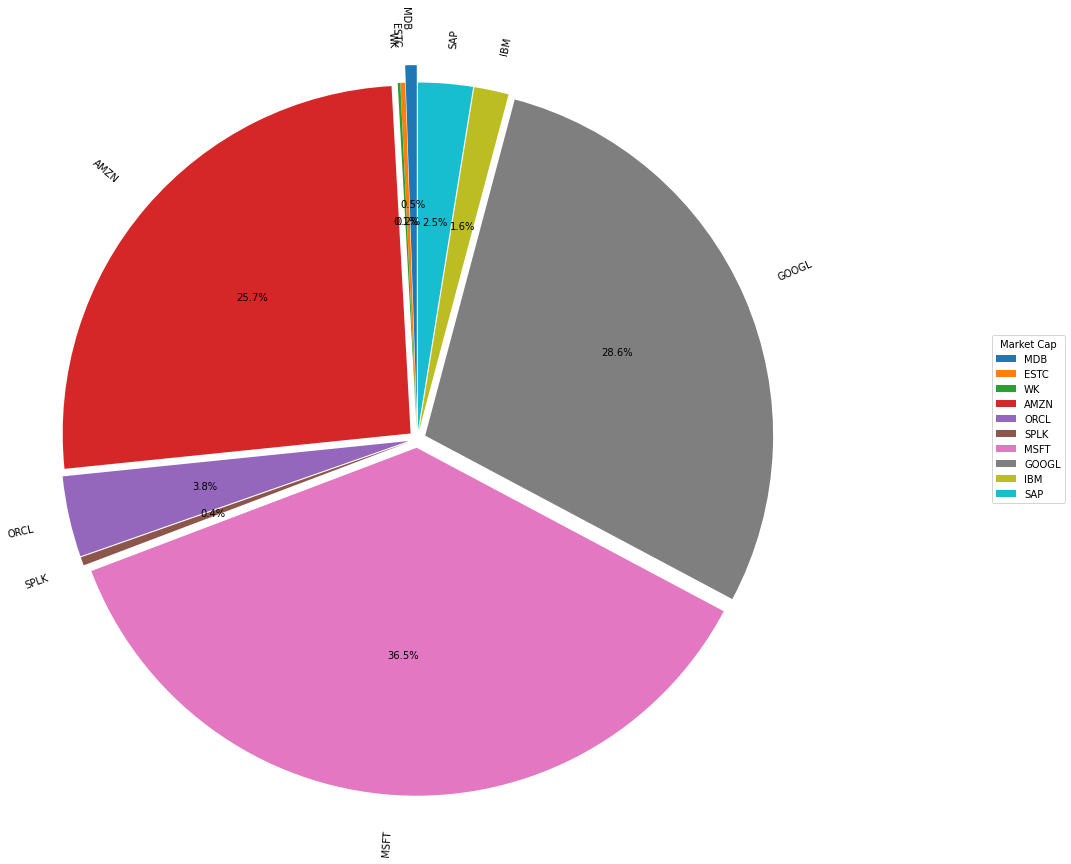

In [7]:
fig, ax = plt.subplots()

explode = []

for i in range(0, info.shape[0]):
    if info.loc[i]['Stock Symbol'] == 'MDB':
        explode.append(0.3)
        continue
    explode.append(0.1)
    
ax.pie(info['Market Cap'], explode=explode, labels=info['Stock Symbol'], 
       startangle=90, radius=4, rotatelabels=True, labeldistance=1.1, autopct='%1.1f%%')

ax.legend(info['Stock Symbol'], title='Market Cap', bbox_to_anchor=(3, 0, 0.5, 1))
plt.show()

# Revenue Comparison
- Variable que informa sobre las ganancias de una empresa

## Conclusiones
- Como hemos observado anteriormente, MongoDB, se encuentra bastante lejos de sus competidoras más grandes.
- También es curioso observar cómo, a pesar de tener menos *Dimensión* que Microsoft (como hemos visto en el gráfico anterior), Amazon se alza con las ganancias.
    - Aunque, también es cierto, que debemos de tener en cuenta que, Amazon, no solo ofrece servicios en la nube como AWS, sino, también se encuentra entre los servicios de entrega de productos a domicilio más utilizados a nivel internacional.
    - Lo mismo se aplica con Google

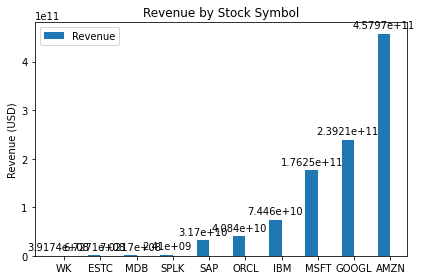

In [8]:
import matplotlib.pyplot as plt
import numpy as np

revCompDF = info.sort_values(by=['Revenue'])

labels = revCompDF['Stock Symbol']
revenues = revCompDF['Revenue']

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, revenues, width, label='Revenue')

ax.set_ylabel('Revenue (USD)')
ax.set_title('Revenue by Stock Symbol')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)

fig.tight_layout()

plt.show()

## Revenue Comparison (Short)
- Analizaremos un poco más con lupa las empresas de ingresos más cercanos a MongoDB, en especial:
    - Workiva
    - Elastic NC
    - Splunk


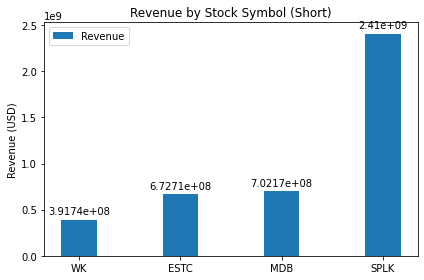

In [9]:
import matplotlib.pyplot as plt
import numpy as np

comparisedSymbols = ['WK', 'ESTC', 'MDB', 'SPLK']

revCompDFShort = revCompDF[revCompDF['Stock Symbol'].isin(comparisedSymbols)]

labels = revCompDFShort['Stock Symbol']
revenues = revCompDFShort['Revenue']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, revenues, width, label='Revenue')

ax.set_ylabel('Revenue (USD)')
ax.set_title('Revenue by Stock Symbol (Short)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)

fig.tight_layout()

plt.show()

# Market Cap and Revenue Scatter Plot
- Mostraremos un gráfico de dispersión donde:
    - OX: Representará la *Dimensión* de la empresa
    - OY: Representará los ingresos.
    
## Conclusiones
- Podemos observar, como ya habíamos anticipado antes, una gran separación entre los grupos:
    - Grupo 1:
        - MongoDB
        - Elastic NC
        - Workiva
        - Splunk
    - Grupo 2:
        - IBM
        - SAP SE
        - Oracle
    - Grupo 3:
        - Amazon
        - Google
        - Microsoft
        
- De este gráfico podemos observar cómo la dimensión de una empresa no es lo único determinante para obtener un mayor número de ingresos y, para probarlo, basta con observar Amazon que, a pesar de ser de menor dimensión que Microsoft, tiene unas ingresos muy altos.

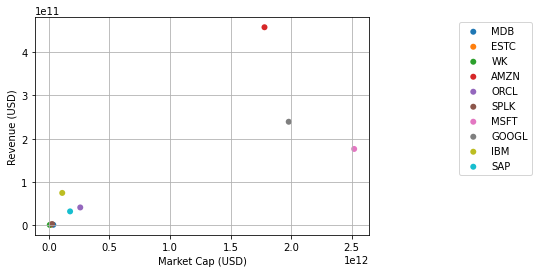

In [10]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
for i in range(0, info.shape[0]):
    x, y = info.iloc[i][['Market Cap', 'Revenue']]
    ax.scatter(x, y, label=info.iloc[i]['Stock Symbol'],
               alpha=1, edgecolors='none')

ax.set_xlabel('Market Cap (USD)')
ax.set_ylabel('Revenue (USD)')
ax.legend(bbox_to_anchor=(1, 0, 0.5, 1))
ax.grid(True)

plt.show()

# Earnings Per Share (EPS)
- Determina las ganancias por activo.

## Conclusiones
- Podemos observar cómo de rentables son las inversiones en Google y Amazon mientras que, Splunk, MongoDB, Elastic y Workiva se encuentran ahora brindando *ganancias negativas*.

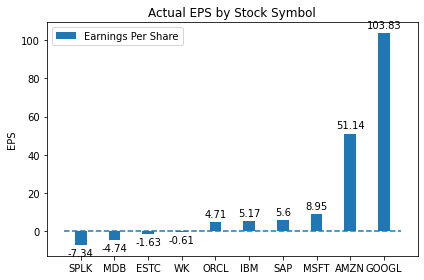

In [11]:
import matplotlib.pyplot as plt
import numpy as np

epsCompDF = info.sort_values(by=['EPS'])

labels = epsCompDF['Stock Symbol']
eps = epsCompDF['EPS']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, eps, width, label='Earnings Per Share')

ax.set_ylabel('EPS')
ax.set_title('Actual EPS by Stock Symbol')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)

fig.tight_layout()

rect = np.arange(-0.5, 10, 1)
plt.plot(rect, 0*rect, '--')

plt.show()

# EPS (Short)
- Aquí restringimos nuestro análisis a aquellas empresas más cercanas a MongoDB en lo que a EPS se refiere.

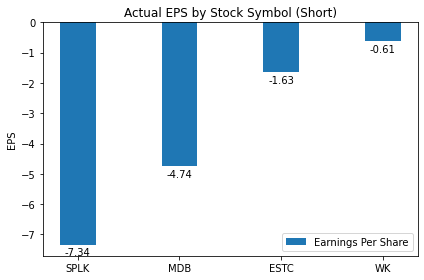

In [12]:
import matplotlib.pyplot as plt
import numpy as np

comparisedSymbols = ['WK', 'ESTC', 'MDB', 'SPLK']

epsShort = epsCompDF[epsCompDF['Stock Symbol'].isin(comparisedSymbols)]
labels = epsShort['Stock Symbol']
eps = epsShort['EPS']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, eps, width, label='Earnings Per Share')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EPS')
ax.set_title('Actual EPS by Stock Symbol (Short)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)

fig.tight_layout()

plt.show()

# Price Earnings Ratio (P/E)
- Indica cómo de caras están las acciones comparadas con los beneficios que aportan
- Muchos de los símbolos que nos hubiese gustado tratar no se encuentran con este dato en [investing.com](www.investing.com)

## Conclusiones
- Podemos observar que, comparando con los datos recogidos en las gráficas de Earnings Per Share (EPS) anteriores, las acciones más caras (Amazon) no son las que más beneficios aportan (como sí lo dan las acciones de Google).
- Sin embargo, estos precios son muy caros y no tienen una gran variación en poco tiempo como veremos con el análisis del Beta de cada empresa.

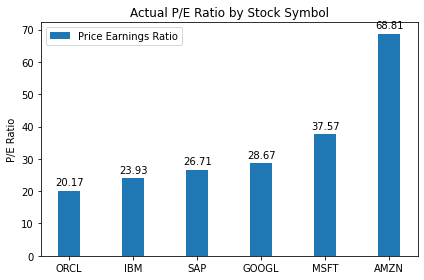

In [13]:
import matplotlib.pyplot as plt
import numpy as np

peRatioCompDF = info.sort_values(by=['P/E Ratio'])
peRatioCompDF = peRatioCompDF[peRatioCompDF['P/E Ratio'].notnull()]


labels = peRatioCompDF['Stock Symbol']
peRatio = peRatioCompDF['P/E Ratio']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, peRatio, width, label='Price Earnings Ratio')

ax.set_ylabel('P/E Ratio')
ax.set_title('Actual P/E Ratio by Stock Symbol')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)

fig.tight_layout()

plt.show()

# Beta and Indexes comparison
- Para este apartado mostraremos el valor de los índices a lo largo del tiempo y el valor del Beta para cada empresa analizada.
- Es importante recordar que, de todas las empresas analizadas, encontramos que sus acciones cotizan en diferentes mercados así que no podemos compararlos en el mismo gráfico pues sería mucha información. Por ello, dividimos los análisis por índice.
- También es importante tener en cuenta la definición de Beta y su relación con los índices (es posible encontrar esa relación en el siguiente [enlace](https://www.eleconomista.es/diccionario-de-economia/beta)).

In [14]:
import pandas as pd

indexes = pd.DataFrame()

for index in INDEXES_TRACKED:
    data = investpy.get_index_historical_data(index=index, country='united states', from_date='01/01/2018', to_date='01/01/2022')
    data['Index Symbol'] = index
    indexes = pd.concat([indexes, data])

indexes

,Open,High,Low,Close,Volume,Currency,Index Symbol
Date,,,,,,,
2018-01-02,6937.6,7006.9,6924.1,7006.9,462202336,USD,NASDAQ
2018-01-03,7017.1,7069.1,7016.7,7065.5,483918400,USD,NASDAQ
2018-01-04,7089.5,7098.0,7072.4,7077.9,493874592,USD,NASDAQ
2018-01-05,7105.7,7137.0,7097.1,7136.6,476410528,USD,NASDAQ
2018-01-08,7135.4,7161.4,7124.1,7157.4,497211072,USD,NASDAQ
...,...,...,...,...,...,...,...
2021-11-01,17016.4,17138.4,17016.4,17131.1,0,USD,NYSE COMPOSITE
2021-11-02,17131.1,17131.1,17078.8,17116.3,0,USD,NYSE COMPOSITE
2021-11-03,17115.2,17220.6,17082.0,17209.8,0,USD,NYSE COMPOSITE


In [15]:
stockIndexes = {}

for row in range(0, info.shape[0]):
    data = investpy.search_quotes(text=info.iloc[row]['Stock Symbol'], products=['stocks'], countries=['united states'], n_results=1).__dict__
    stockIndexes.setdefault('NYSE COMPOSITION' if data['exchange'] == 'NYSE' else data['exchange'], []).append(data['symbol'])
    
stockIndexes
    

{'NASDAQ': ['MDB', 'AMZN', 'SPLK', 'MSFT', 'GOOGL'],
 'NYSE COMPOSITION': ['ESTC', 'WK', 'ORCL', 'IBM', 'SAP']}

## NASDAQ

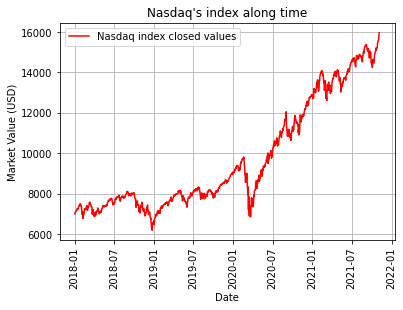

In [16]:
import matplotlib.pyplot as plt

nasdaq = indexes[indexes['Index Symbol'] == 'NASDAQ']

fig, ax = plt.subplots()

plt.xticks(rotation=90)
plt.plot_date(x=nasdaq.index, y=nasdaq['Close'], linestyle='solid', color='r', markersize=0, label='Nasdaq index closed values')

ax.set_title('Nasdaq\'s index along time')
ax.set_xlabel('Date')
ax.set_ylabel('Market Value (USD)')
ax.legend(bbox_to_anchor=(1, 0, 0.5, 1))
ax.grid(True)

ax.legend()

plt.show()

### NASDAQ BETA
- Podemos observar cómo, la acción con mayor variabilidad/riesgo en relación con el índice NASDAQ, es Splunk y, la que menos, MongoDB.
    - Por esto anterior podemos concluir que, si el valor del índice bajase, Splunk bajaría mucho más rápido que MongoDB.
- Es importante mencionar que acciones como las de Google tienen un Beta/riesgo más cercano a 1 por lo que no tendería a cambiar si el índice cambiase.

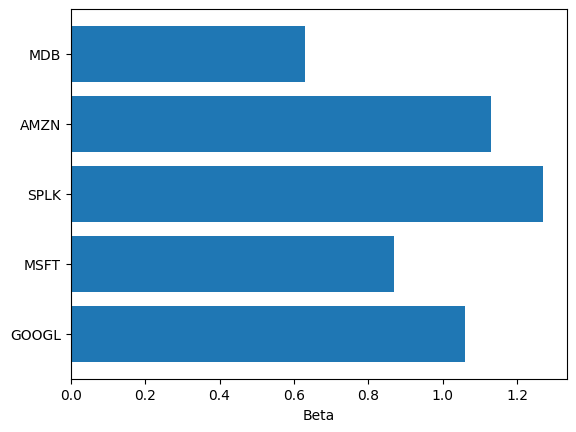

In [17]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

nasdaqStockSymbols = stockIndexes['NASDAQ']
nasdaqStocks = info[info['Stock Symbol'].isin(nasdaqStockSymbols)]
y_pos = np.arange(len(nasdaqStockSymbols))
beta = nasdaqStocks['Beta']

ax.barh(y_pos, beta, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(nasdaqStockSymbols)
ax.invert_yaxis()
ax.set_xlabel('Beta')

plt.show()

## NYSE

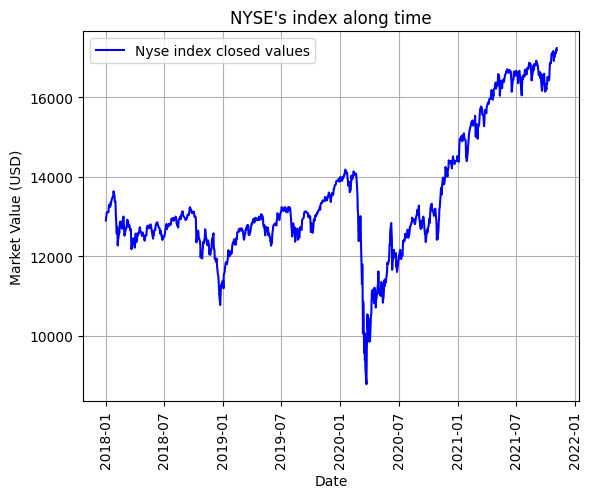

In [20]:
import matplotlib.pyplot as plt

nyse = indexes[indexes['Index Symbol'] == 'NYSE COMPOSITE']

fig, ax = plt.subplots()

plt.xticks(rotation=90)
plt.plot_date(x=nyse.index, y=nyse['Close'], linestyle='solid', color='b', markersize=0, label='Nyse index closed values')

ax.set_title('NYSE\'s index along time')
ax.set_xlabel('Date')
ax.set_ylabel('Market Value (USD)')
ax.legend(bbox_to_anchor=(1, 0, 0.5, 1))
ax.grid(True)

ax.legend()

plt.show()

### NYSE BETA
- Podemos observar cómo, la acción con mayor variabilidad/riesgo en relación con el índice NYSE, es Workiva y, la que menos, Oracle.
    - Por esto anterior podemos concluir que, si el valor del índice bajase, Workiva bajaría mucho más rápido que Oracle.
- Es importante mencionar que acciones como las de IBM ó SAP tienen un Beta/riesgo más cercano a 1 por lo que no tendería a cambiar si el índice cambiase.

#### Nota
- No se tienen datos de Elastic NC para su Beta por lo que se le ha asignado el valor ``0``

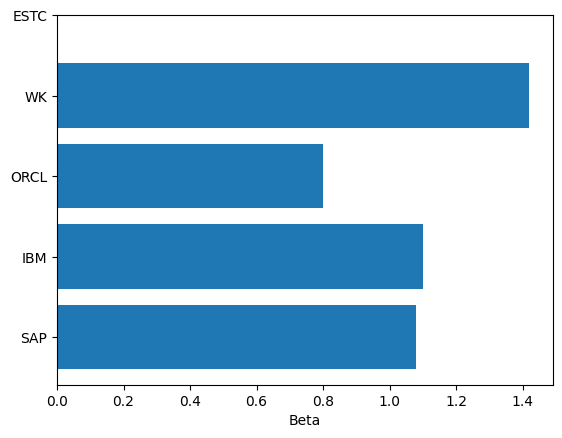

In [21]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

nyseStockSymbols = stockIndexes['NYSE COMPOSITION']
nyseStocks = info[info['Stock Symbol'].isin(nyseStockSymbols)]
y_pos = np.arange(len(nyseStockSymbols))
beta = nyseStocks['Beta']

ax.barh(y_pos, beta, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(nyseStockSymbols)
ax.invert_yaxis()
ax.set_xlabel('Beta')

plt.show()

# Conclusiones finales
- Hemos observado que, MongoDB, tiene una dura competencia y se encuentra compitiendo contra gigantes pero no es la única, además, tiene un modelo de negocio estable y que reporta beneficios (aunque no en este momento a sus accionistas).
- También tiene un gran punto fuerte que es el mantenimiento del gestor de Bases de Datos NoSQL más popular (MongoDB) por lo que, disfruta de una posición ventajosa frente a los competidores de nuevo ingreso en este mercado acumulando experiencia, clientes y datos.
